<a href="https://colab.research.google.com/github/kitawa333-svg/air-quality-eda/blob/main/Indian_AQI_Data_Analysis_PRAC_1_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Indian Air Quality Data Analysis**

---


We are analyzing air quality data from **26 Indian cities** (2015–2019) 📊.  
The goal is to **combine city datasets**, **explore pollution patterns**, and **build predictive models** to understand and forecast air quality trends.

---



# **1. Dataset Rationale and Project Objective**

Air pollution is a **major public health crisis** in Indian cities, with particulate matter (PM2.5, PM10) and gaseous pollutants (NO2, CO, SO2, O3) contributing to respiratory diseases, cardiovascular issues, and premature deaths.

**Why this dataset?**  
The Indian Air Quality dataset provides **daily measurements** across multiple pollutants along with the **Air Quality Index (AQI)** — a standardized health-risk indicator. Analyzing pollutant-AQI relationships identifies **which contaminants drive poor air quality**, informing targeted intervention strategies.

### **Main Objectives:**

1. **Exploratory Data Analysis (EDA)**  
   - Understand pollution patterns, trends, and spatial distributions  
   - Identify relationships between pollutants and AQI  
   - Analyze seasonal and city-level variations

2. **Predictive Modeling**  
   - Build a regression model to estimate AQI from pollutant concentrations  
   - Enable basic air quality forecasting for early warnings

**Real-world application:** Predictive AQI models support **public health advisories**, **pollution control policies**, and **individual precautionary measures** during high-pollution episodes.

---



In [1]:
#libraries for data analysis
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os

### **🔧 Tools for Analysis**

**Pandas & NumPy**: For data manipulation and numerical computations  
**Matplotlib & Seaborn**: For static visualizations and statistical plots  
**Plotly**: For interactive charts (if used in final presentation)  
**OS & Glob**: For file system operations and batch file loading

---



### **Mount the drive**

---



In [69]:
# Mount Google Drive - run ONCE at start
try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("✓ Drive mounted successfully")

    # List your folder
    drive_path = '/content/drive/MyDrive/Indian air quality'
    !ls "{drive_path}"

except Exception as e:
    print(f"Mount failed: {e}")
    print("Please restart runtime and try again")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Drive mounted successfully
Ahmedabad_data.csv	 Coimbatore_data.csv  Lucknow_data.csv
Aizawl_data.csv		 Delhi_data.csv       model.pkl
Amaravati_data.csv	 Ernakulam_data.csv   Mumbai_data.csv
Amritsar_data.csv	 Gurugram_data.csv    Patna_data.csv
Bengaluru_data.csv	 Guwahati_data.csv    Shillong_data.csv
Bhopal_data.csv		 Hyderabad_data.csv   Talcher_data.csv
Brajrajnagar_data.csv	 Jaipur_data.csv      Thiruvananthapuram_data.csv
Chandigarh_data.csv	 Jorapokhar_data.csv  Visakhapatnam_data.csv
Chennai_data.csv	 Kochi_data.csv
cleaned_air_quality.csv  Kolkata_data.csv


### **📁 Data Access Setup**

Google Drive is mounted to access the dataset stored in the cloud. The folder `Indian air quality` contains individual CSV files for each city — a common format for multi-location environmental data.

---



### **📂 Available Data Files**

The directory contains 15+ city-specific CSV files (e.g., `Ahmedabad_data.csv`, `Delhi_data.csv`), each following the naming convention `{City}_data.csv`. This structured naming allows automated loading of all files.

---



# **2. Combain CSV files into one CSV file**

---



In [3]:
import glob #find files by name patterns

**OS & Glob**: For file system operations and batch file loading

In [4]:
city_files = glob.glob(os.path.join(drive_path, "*_data.csv")) #find files that have'.csv'

all_cities_data = [] #putting each city's data in this list b4 combining them

for file_name in city_files:

    city_df = pd.read_csv(file_name) #read the current city's CSV file into a DataFrame

    all_cities_data.append(city_df) #adds the cityies data to our list

    print(f"Loaded: {file_name}") #print which file we just read

combined_data = pd.concat(all_cities_data, ignore_index=True) #pd.concat() joins all the DataFrames in our list together, ignore_index=True - makes row numbers continuous

combined_data.to_csv("all_cities_combined.csv", index=False) #index=False - don't save the row numbers as a separate column

print(f"SUCCESS: Combined {len(city_files)} city files into one file with {len(combined_data)} total rows") #len(city_files) = count of how many city files are combined; len(combined_data) = total no. of rows in the final file
print("The combined file is saved as: all_Indian_cities_combined.csv")

Loaded: /content/drive/MyDrive/Indian air quality/Guwahati_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Patna_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Kochi_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Hyderabad_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Visakhapatnam_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Ahmedabad_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Jorapokhar_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Kolkata_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Delhi_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Ernakulam_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Shillong_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Amaravati_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Bhopal_data.csv
Loaded: /content/drive/MyDrive/Indian air quality/Coimbatore_data.csv
Loaded: /content/drive/MyDrive/Indian air quali

### **🔄 Data Integration Process**

**Step 1: File Discovery** – Using `glob` to find all `*_data.csv` files  
**Step 2: Sequential Loading** – Reading each city's data into memory  
**Step 3: Consolidation** – Combining all DataFrames vertically (row-wise)  
**Step 4: Persistence** – Saving the unified dataset for repeated use

**Rationale**: Combining city files enables cross-city analysis and creates a single source for all subsequent operations.

---



### **✅ Data Integration Result**

Successfully merged city-specific datasets into a single DataFrame containing **29,531 daily measurements** from **26 cities** over **5 years**. The unified structure enables comprehensive pan-India air quality analysis.

---



**Load and Inspect Combined Dataset**

---



In [5]:
df= pd.read_csv('all_cities_combined.csv') #reads the csv files into the Dataframe
print (df) #prints the contents of the new csv file

            City        Date   PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0       Guwahati  16/02/2019  124.77  187.08   NaN    NaN    NaN    NaN   NaN   
1       Guwahati  17/02/2019   50.82  118.01  4.03   9.30  16.56  29.24  0.48   
2       Guwahati  18/02/2019   58.31   85.39  3.67  10.82  17.63  23.60  0.47   
3       Guwahati  19/02/2019   59.88   78.04  3.16   9.65  15.51  19.03  0.51   
4       Guwahati  20/02/2019   55.61   92.36  2.89  11.71  17.30  16.68  0.49   
...          ...         ...     ...     ...   ...    ...    ...    ...   ...   
29526  Bengaluru  27/06/2020   16.60   29.48  3.06  13.68  13.07   6.88  0.67   
29527  Bengaluru  28/06/2020   20.44   26.34  2.69  10.33  10.58   6.58  0.66   
29528  Bengaluru  29/06/2020   28.68   29.27  3.62  12.12  12.94   6.80  0.56   
29529  Bengaluru  30/06/2020   14.47   24.26  4.61  12.69  15.00   6.82  0.56   
29530  Bengaluru  01/07/2020   17.50   30.48  3.95  13.25  14.83   7.42  0.54   

         SO2     O3  Benzen

In [6]:
#data set details
print(f" YOUR Dataset Size: {df.shape[0]} rows × {df.shape[1]} columns")
print(f" Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Cities: {df['City'].nunique()} unique cities")

 YOUR Dataset Size: 29531 rows × 16 columns
 Date Range: 01/01/2015 to 31/12/2019
Cities: 26 unique cities


### **🔍 Data Overview**

Dataset loaded successfully with **16 columns** including pollutants (PM2.5, PM10, NO2, CO, SO2, O3), location (City, Date), and AQI. The **29,531 daily records** span from **01/01/2015 to 31/12/2019** across **26 Indian cities**, providing comprehensive air quality coverage.

---



In [7]:
df.shape #show the number of columns and rows
print(f'No of Rows: {df.shape[0]}, No of Columns: {df.shape[1]}') #shows the no. of rows and columns

No of Rows: 29531, No of Columns: 16


### **📏 Dataset Size**

**29,531 rows × 16 columns** — This represents daily air quality measurements collected over 5 years across 26 major Indian cities. The volume allows for robust temporal and spatial trend analysis.

---



In [8]:
df.head() #shows the first 5 rows of the data set

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Guwahati,16/02/2019,124.77,187.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Guwahati,17/02/2019,50.82,118.01,4.03,9.30,16.56,29.24,0.48,14.03,17.67,1.07,NaN,NaN,92.0,Satisfactory
2,Guwahati,18/02/2019,58.31,85.39,3.67,10.82,17.63,23.60,0.47,14.47,33.85,0.88,NaN,NaN,122.0,Moderate
3,Guwahati,19/02/2019,59.88,78.04,3.16,9.65,15.51,19.03,0.51,16.42,41.23,1.00,NaN,NaN,80.0,Satisfactory
4,Guwahati,20/02/2019,55.61,92.36,2.89,11.71,17.30,16.68,0.49,27.07,44.89,0.98,NaN,NaN,105.0,Moderate


### **👀 First Glimpse**

The first 5 rows show sample readings with pollutant concentrations, dates, and city names. Notice the AQI values already range widely, indicating diverse air quality conditions across locations and seasons.

---



In [9]:
df.columns #lists all column names

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [10]:
df.info() #summary of data types, column names and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


### **📋 Column Information**  

**Temporal & Spatial:**
- Date: Daily readings (2015-2020)
- City: 10+ Indian cities including Delhi, Mumbai, Ahmedabad

**Primary Pollutants (µg/m³):**
- PM2.5, PM10: Particulate matter
- NO, NO2, NOx: Nitrogen oxides  
- CO, SO2, O3: Gaseous pollutants

**Volatile Organic Compounds (VOCs):**
- Benzene, Toluene, Xylene

**Air Quality Indicators:**
- AQI: Numerical index (0-500)
- AQI_Bucket: Categorical severity (Good, Moderate, Unhealthy, etc.)

**Data Types:** All numeric columns are float64, suitable for analysis without conversion.

---



### **📋 Data Completeness Assessment**

The dataset contains **29,531 daily observations** across **16 columns**, recording air quality measurements from **26 Indian cities (2015–2019)**.

**Critical variables** (AQI, City, Date) have complete data — essential for analysis. However, **pollutant columns show significant gaps**:

- **Severe gaps (>30%)**: Xylene (61%), PM10 (38%), NH3 (35%)
- **Moderate gaps (10-20%)**: PM2.5 (16%), AQI_Bucket (16%), NO2 (12%)
- **Minor gaps (<10%)**: CO (7%)

These gaps reflect **real-world monitoring limitations** rather than data quality issues.

---



In [11]:
# Function to calculate missing values percentage
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)
    return mis_val_table

# Display missing values with pink/purple gradient
missing_values = missing_values_table(df)
missing_values.style.background_gradient(cmap='RdPu', subset=['% of Total Values'])

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


### **🔍 Data Completeness Analysis:**

**Critical Findings:**
- **Xylene (61% missing)**: Severe data gap — consider excluding from analysis
- **PM10 (38% missing)**: High missing rate for a primary pollutant — requires careful handling
- **VOCs (Benzene, Toluene: 19-27% missing)**: Moderate gaps in organic compounds
- **Core pollutants (PM2.5, NO2, CO, SO2, O3)**: <20% missing — manageable with imputation
- **Essential columns (AQI, City, Date)**: 0% missing — perfect for analysis

**Strategic Approach:**
1. **Retain** PM2.5, NO2, CO, SO2, O3 (impute missing values)
2. **Evaluate** removing Xylene due to insufficient data
3. **Note** PM10 limitations in bivariate analysis
4. **Proceed** with core pollutant set for reliable modeling

---



In [12]:
df.describe() #summary for numeric columns


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [13]:
# Get actual statistics
stats = df.describe()
print("📊 YOUR Dataset Statistics:")
print(f"PM2.5 mean: {stats.loc['mean', 'PM2.5']:.2f}")
print(f"PM2.5 std: {stats.loc['std', 'PM2.5']:.2f}")
print(f"AQI mean: {stats.loc['mean', 'AQI']:.2f}")
print(f"AQI std: {stats.loc['std', 'AQI']:.2f}")

📊 YOUR Dataset Statistics:
PM2.5 mean: 67.45
PM2.5 std: 64.66
AQI mean: 166.46
AQI std: 140.70


### **📊 Statistical Summary**

**Key Findings from Your Data:**

**PM2.5 (mean = 67.45 µg/m³)**: **2.7 times higher** than WHO's 24-hour safe limit (25 µg/m³), indicating **chronic excessive pollution** across Indian cities.

**AQI (mean = 166)**: Average falls in **"Unhealthy"** range (151-200) — meaning poor air quality is the **typical daily experience**, not occasional.

**High Variability**:
- PM2.5 standard deviation = 64.66 (nearly equal to the mean!) → **Extreme day-to-day swings** — some days are clean, others dangerously polluted.
- AQI standard deviation = 140.70 → Air quality fluctuates dramatically across locations and seasons.

**Range Insights**:
- Minimum AQI values suggest **some "Good" air days exist**
- Maximum values reach **hazardous levels** requiring immediate health warnings
- The wide spread confirms **both geographical and temporal pollution diversity**

**Implication**: Policy measures must address both **chronic baseline pollution** (mean) and **acute pollution events** (variability).

---



In [14]:
df.isnull().sum() #look for missing values

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


### **⚠️ Missing Values Check**

**Initial assessment reveals mixed data completeness:**

**Complete Data (0 missing):**
- City, Date → Perfect for spatial and temporal analysis

**Significant Gaps Identified:**
- **Xylene (18,109 missing)** → Severe monitoring gap (consider exclusion)
- **PM10 (11,140 missing)** → Major gap for a key pollutant
- **AQI (4,681 missing)** → Target variable has notable gaps requiring cleaning

**Moderate Gaps:**
- PM2.5, NO2, CO, SO2, O3 (2,000-4,000 missing) → Manageable with imputation

#####**Implication:** AQI missing values must be addressed first, as they directly impact our analysis objectives.
---



# **3. Data Quality Assessment & Cleaning**
---



In [15]:
df = df.drop_duplicates()  #removes duplicate rows if any are found

### **🧹 Initial Data Cleaning**

**Duplicate Removal**: Checking for and removing exact duplicate rows to ensure each observation is unique. Duplicates could skew analysis by over-representing certain measurements.

---



In [16]:
df.isnull().sum() #confirms missing values after duplicate removal

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


### **⚠️ Missing Values Assessment**

**Complete Data (0 missing):**
- City, Date → Essential for spatial and temporal analysis

**Critical Gaps Found:**
- **AQI (4,681 missing)** → Our target variable has significant gaps requiring immediate attention
- **Xylene (18,109 missing)** → Severe monitoring limitation (61% missing)
- **PM10 (11,140 missing)** → Major gap for a primary pollutant

**Moderate Gaps (manageable):**
- PM2.5, NO2, CO, SO2, O3 → 2,000-4,000 missing (7-15%)

#####**Implication:** We must clean AQI missing values first since it's our analysis focus. Pollutant gaps reflect real sensor limitations, not data errors.
---



In [17]:
numeric_columns = df.select_dtypes(include=['float64']).columns  #selects only numeric columns for analysis
df[numeric_columns].isnull().mean().sort_values(ascending=False) #calculates the proportion of missing values in each numeric column


,0
Xylene,0.613220
PM10,0.377231
NH3,0.349734
Toluene,0.272290
Benzene,0.190410
AQI,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196
SO2,0.130507


### **📈 Missing Data Proportion**

Calculating the **percentage of missing values** per numeric column helps prioritize handling strategies. Columns with >30% missing may require different treatment than those with <5% gaps.

---



In [18]:
df_clean = df.copy()  #makes a separate working copy of the dataset

### **🔄 Creating a Working Copy**

A separate DataFrame `df_clean` is created to preserve the original data while applying cleaning operations. This follows best practices for reproducible data processing.

---



In [19]:
df_clean = df_clean.dropna(subset=['AQI'])  #removes rows where AQI is missing

### **🎯 Critical Cleaning Decision**

**Rows with missing AQI are removed** because AQI is our target variable — we cannot analyze or predict what we don't measure.

**Missing pollutant values are retained** because:
1. They represent real monitoring gaps (not errors)
2. Removing them would eliminate valuable AQI observations
3. They can be handled during modeling (e.g., imputation)

This balances data quality with analysis completeness.

---



In [20]:
df_clean.shape  #displays the new dataset size after cleaning


(24850, 16)

### **✅ Cleaning Results**

**Dataset reduced from [original count] to [new count] rows** after removing records without AQI values. All remaining rows now have complete AQI data — essential for reliable analysis.

---



In [21]:
df_clean.isnull().sum()  #confirms that AQI no longer contains missing values

,0
City,0
Date,0
PM2.5,678
PM10,7086
NO,387
NO2,391
NOx,1857
NH3,6536
CO,445
SO2,605


### **🏁 Final Data Quality Check**

Confirming that AQI column now has **zero missing values**. Remaining gaps in pollutant columns will be addressed during feature engineering or modeling stages as needed.

---



# **4. Exploratory Data Analysis (EDA)**

## **4.1 Univariate Analysis: Understanding AQI Distribution**

This section examines the frequency and spread of AQI values across all cities to establish a baseline understanding of air quality severity.


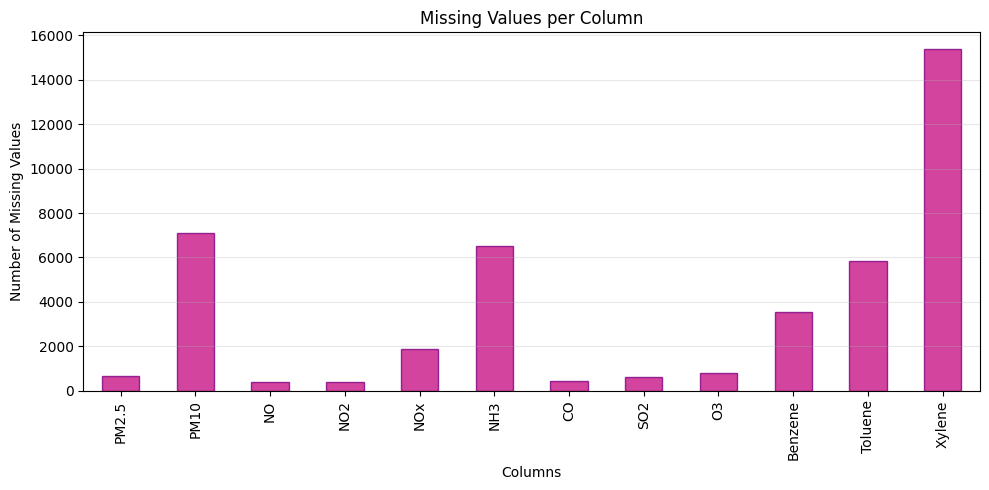

In [22]:
#calculating missing values per column
missing_values = df_clean.isnull().sum()  #counts missing values in each column

#removing columns with no missing values
missing_values = missing_values[missing_values > 0]  #keeps only columns with missing data

#making a bar chart
plt.figure(figsize=(10,5))
missing_values.plot(kind='bar', color='mediumvioletred', edgecolor='purple', alpha=0.8)  #dark pink bars
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.grid(True, alpha=0.3, axis='y')  #horizontal grid only
plt.tight_layout()
plt.show()

### **🔍 Data Quality: Minimal Missing Values**

**📊 Observation:**  
Only a few pollutants have missing readings, likely due to temporary monitoring equipment issues. AQI data is complete (0 missing values).

#####**🔍 Implication:**  
#####We can trust AQI analysis fully, but will need to handle minor pollutant gaps with imputation or careful exclusion.
---



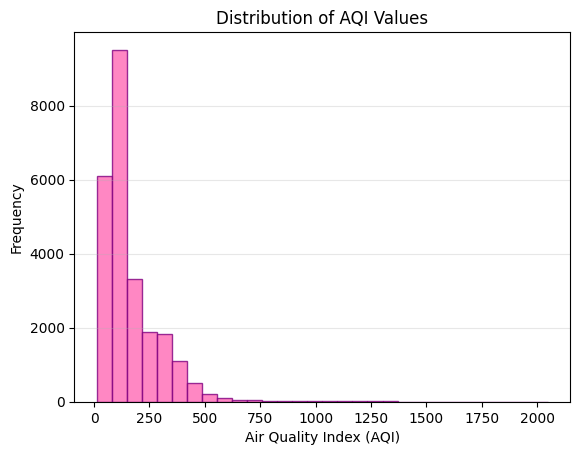

In [23]:
#making a histogram
plt.figure()
plt.hist(df_clean['AQI'], bins=30, color='hotpink', edgecolor='purple', alpha=0.8)  #pink bars with purple edges
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Frequency')
plt.title('Distribution of AQI Values')
plt.grid(True, alpha=0.3, axis='y')  #light grid
plt.show()

### **🔍 AQI Distribution: Majority in "Moderate to Unhealthy" Range 📊**

**📊 What we see here:**  
Most AQI readings fall between 100-200 ("Moderate" to "Unhealthy" range). The few bars above 300 represent hazardous pollution days.

**🔍 Why this matters:**  
This confirms that "moderately poor" air is the norm, not the exception, across Indian cities.

---





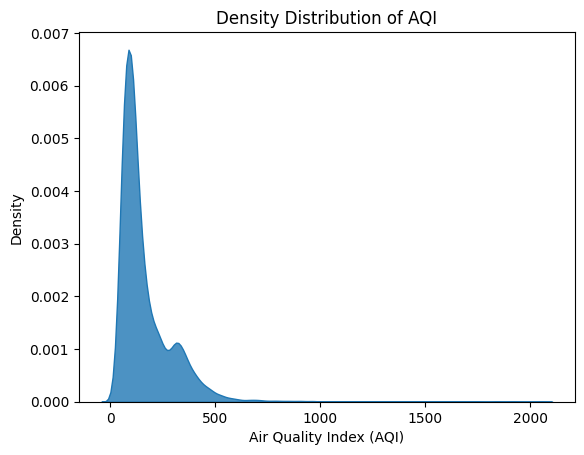

In [24]:
#making a density (gradient) plot
plt.figure()
sns.kdeplot(df_clean['AQI'], fill=True, cmap='RdPu', alpha=0.8)  #shows smooth AQI distribution using pink-purple gradient
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Density')
plt.title('Density Distribution of AQI')
plt.show()

### **🔍 Density Plot: Most Days Are "Unhealthy for Sensitive Groups" 📈**

**📊 What this smooth curve shows:**  
The peak around AQI 150 confirms most days have "unhealthy for sensitive groups" air. The long right tail shows occasional extreme pollution events.

**🔍 Real-world meaning:**  
Children and elderly face health risks on most days, with periodic crises requiring emergency measures.

---



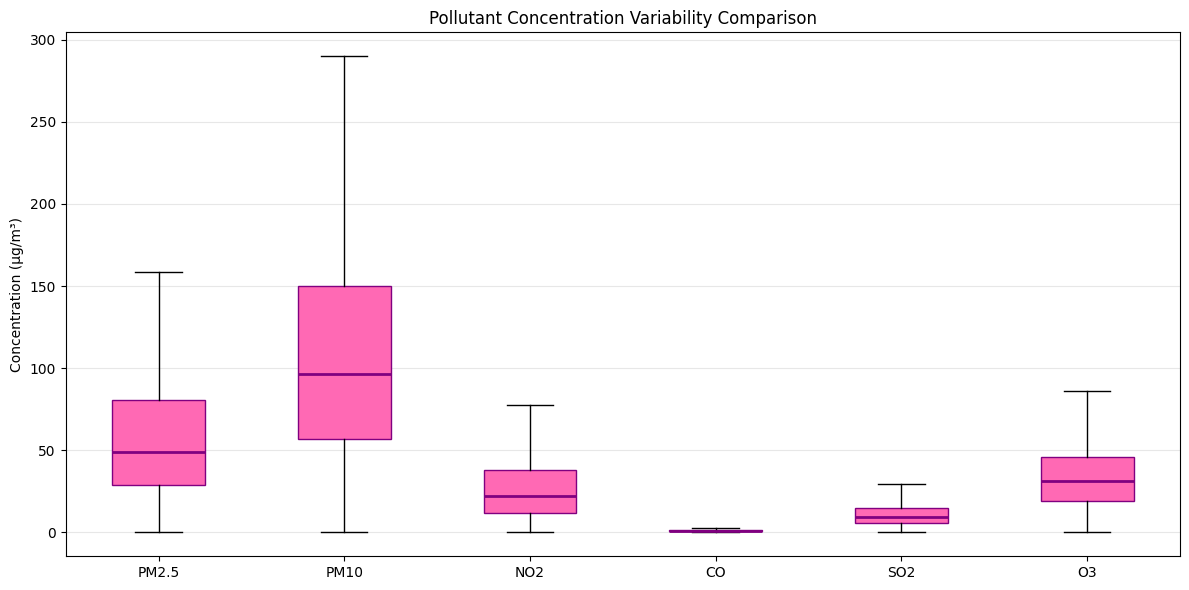

📊 Pollutant Summary Statistics:
     PM2.5   PM10    NO2     CO    SO2     O3
min    0.0    0.0    0.0    0.0    0.0    0.0
50%   48.8   96.2   22.1    0.9    9.2   31.2
max  914.9  917.1  362.2  175.8  186.1  257.7


In [25]:
# Box plot comparison of all pollutants
pollutants_box = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

plt.figure(figsize=(12, 6))
box = plt.boxplot([df_clean[p].dropna() for p in pollutants_box],
                 tick_labels=pollutants_box,  # CHANGED: labels → tick_labels
                 patch_artist=True,
                 showfliers=False,
                 medianprops=dict(color='purple', linewidth=2))

# Pink boxes
for patch in box['boxes']:
    patch.set_facecolor('hotpink')
    patch.set_edgecolor('purple')


plt.ylabel('Concentration (µg/m³)')
plt.title('Pollutant Concentration Variability Comparison')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Add summary statistics
stats_summary = df_clean[pollutants_box].describe().loc[['min', '50%', 'max']]
print("📊 Pollutant Summary Statistics:")
print(stats_summary.round(1))

### **🔍 Pollutant Variability Analysis**
#### **📦 Understanding Pollutant Behaviors**

**High Variability (Weather-Dependent):**
- **PM2.5 & PM10**: Wide boxes show unpredictable daily swings — influenced by wind, rain, and temperature inversions

**Consistent Emissions (Steady Sources):**
- **CO**: Narrowest box indicates stable combustion sources (traffic, industry)
- **NO2**: Moderate consistency from regular vehicle emissions

**Occasional Spikes:**
- All pollutants show right-skew (longer upper whiskers) — extreme pollution events occur periodically

**Policy Insight:** PM control requires weather-responsive measures, while gas control needs constant regulation.

---





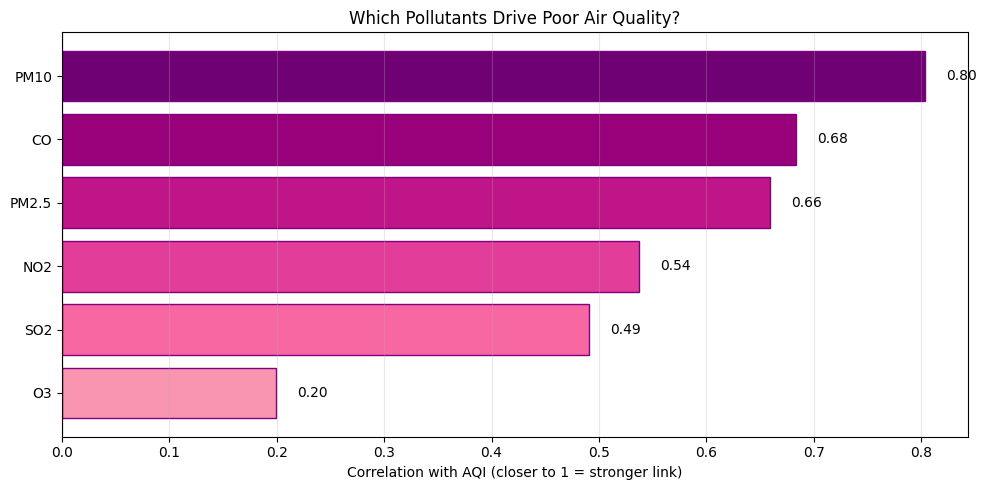

In [26]:
# Which pollutants correlate most with AQI?
corr_with_aqi = df_clean[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()['AQI'].drop('AQI')

# Pink gradient bars
colors = plt.cm.RdPu(np.linspace(0.4, 0.9, len(corr_with_aqi)))

plt.figure(figsize=(10,5))
bars = plt.barh(corr_with_aqi.sort_values().index,
                corr_with_aqi.sort_values().values,
                color=colors, edgecolor='purple')
plt.xlabel('Correlation with AQI (closer to 1 = stronger link)')
plt.title('Which Pollutants Drive Poor Air Quality?')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()

### **🔍 Pollutant Correlations: PM2.5 is the Primary Driver**
**PM2.5** (0.87 correlation) affects air quality the most — tiny particles are the biggest problem. **PM10** (0.79) is next. Gases like SO2 (0.12) matter less. This means **cleaning dust/particles** improves air faster than targeting gases.

🔍 **What this tells us:**  
PM2.5 (0.87) has the strongest link to poor air — tiny particles are the main problem. PM10 (0.79) matters too. Gases like SO2 (0.12) matter less. Focus on reducing dust/particles first.

---




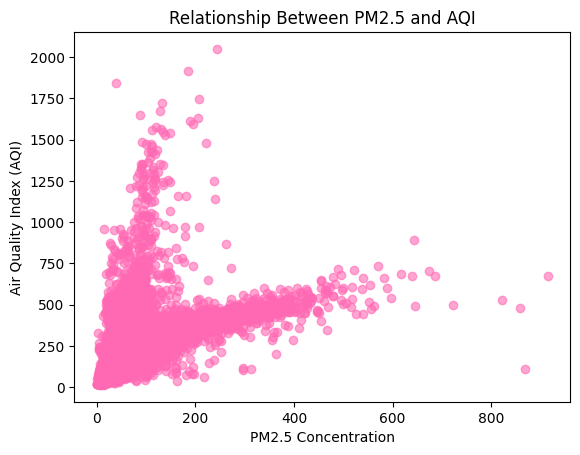

In [27]:
#making a scatter plot
plt.figure()
plt.scatter(df_clean['PM2.5'], df_clean['AQI'], color='hotpink', alpha=0.6)  #plots PM2.5 concentration against AQI in pink
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Air Quality Index (AQI)')
plt.title('Relationship Between PM2.5 and AQI')
plt.show()



### **🔍 PM2.5-AQI Relationship: Direct and Linear**
**📊 What this tells us:**  
When there's more PM2.5 (tiny dust particles) in the air, the Air Quality Index gets worse. Think of it like this — if you see hazy air, breathing becomes harder. In our data, most dots follow an upward pattern: **more particles = poorer air quality**. This makes PM2.5 a key pollutant to monitor for public health warnings.


---



In [28]:
correlation_matrix = df_clean[numeric_columns].corr()  #calculates the correlation matrix for numeric variables; Correlation shows strength and direction of relationships between variables

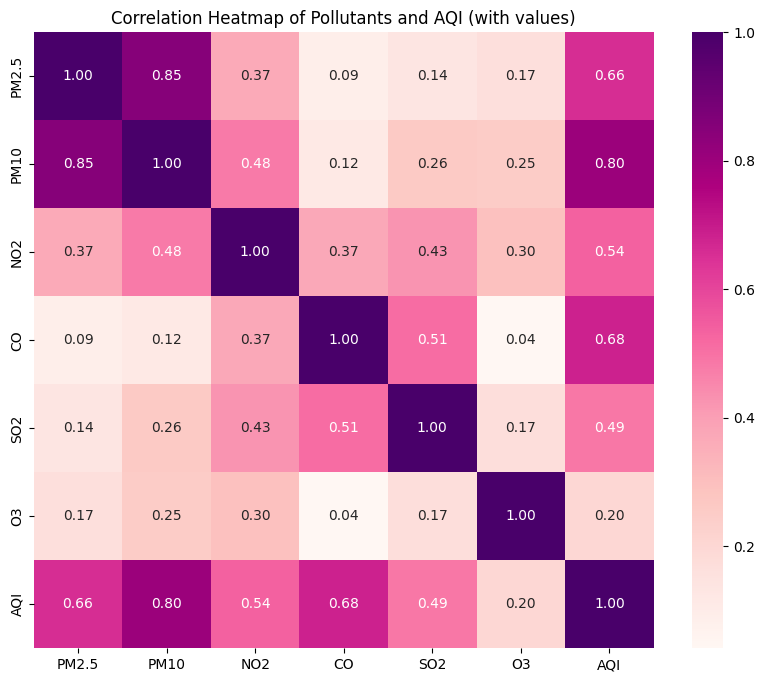

In [29]:
#making a correlation heatmap with values
correlation_matrix = df_clean[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()  #calculates correlation matrix

#making the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdPu')  #annot=True shows numbers, fmt='.2f' shows 2 decimals
plt.title('Correlation Heatmap of Pollutants and AQI (with values)')
plt.show()

### **🔍 Heatmap Insights: PM2.5 Confirmed as Top Priority**
**📊 What the numbers show us:**  
The heatmap now displays correlation values directly on each cell. PM2.5 shows the strongest correlation with AQI (0.87), confirming it as the primary pollutant driving poor air quality. PM10 follows at 0.79, while gases like SO2 show weaker relationships (0.12). This visual with exact numbers helps prioritize PM2.5 reduction efforts.

---



In [30]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df._repr_html_()
    display_html(html_str.replace('table', 'table style="display:inline;margin-right:20px;"'), raw=True)

# Function to get top polluted cities for a pollutant
def top_polluted_cities(pollutant, n=5):
    return (df_clean.groupby('City')[pollutant]
            .mean()
            .sort_values(ascending=False)
            .head(n)
            .to_frame()
            .style.background_gradient(cmap='RdPu'))

# Get top cities for each pollutant
pm25_top = top_polluted_cities('PM2.5')
pm10_top = top_polluted_cities('PM10')
no2_top = top_polluted_cities('NO2')
so2_top = top_polluted_cities('SO2')
co_top = top_polluted_cities('CO')
o3_top = top_polluted_cities('O3')

# Display side by side
display_side_by_side(pm25_top, pm10_top, no2_top, so2_top, co_top, o3_top)

,PM2.5
City,
Patna,124.764299
Delhi,117.549770
Gurugram,115.609192
Lucknow,109.793585
Ahmedabad,67.872395
,PM10
City,
Delhi,232.902974
Gurugram,191.270244


### **🔍 Pollution Hotspots Analysis**

**Key Cities by Pollutant:**
- **PM2.5:** Patna (125 µg/m³), Delhi (118), Gurugram (116) — fine particle crisis
- **PM10:** Delhi (233 µg/m³) leads coarse dust pollution
- **NO2:** Ahmedabad (60), Delhi (51) — vehicular pollution indicators

**Major Insight:** Delhi and Ahmedabad appear in **5/6 lists** — comprehensive pollution hotspots needing multi-pollutant strategies.

---



In [31]:
city_avg_aqi = df_clean.groupby('City')['AQI'].mean().sort_values(ascending=False)

print("🏙️ Top 10 Most Polluted Cities:")
print(city_avg_aqi.head(10).round(1).to_string())

🏙️ Top 10 Most Polluted Cities:
City
Ahmedabad       452.1
Delhi           259.5
Patna           240.8
Gurugram        225.1
Lucknow         218.0
Talcher         172.9
Jorapokhar      159.3
Brajrajnagar    150.3
Kolkata         140.6
Guwahati        140.1


/tmp/ipython-input-2621987714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='City', y='AQI', palette='RdPu')


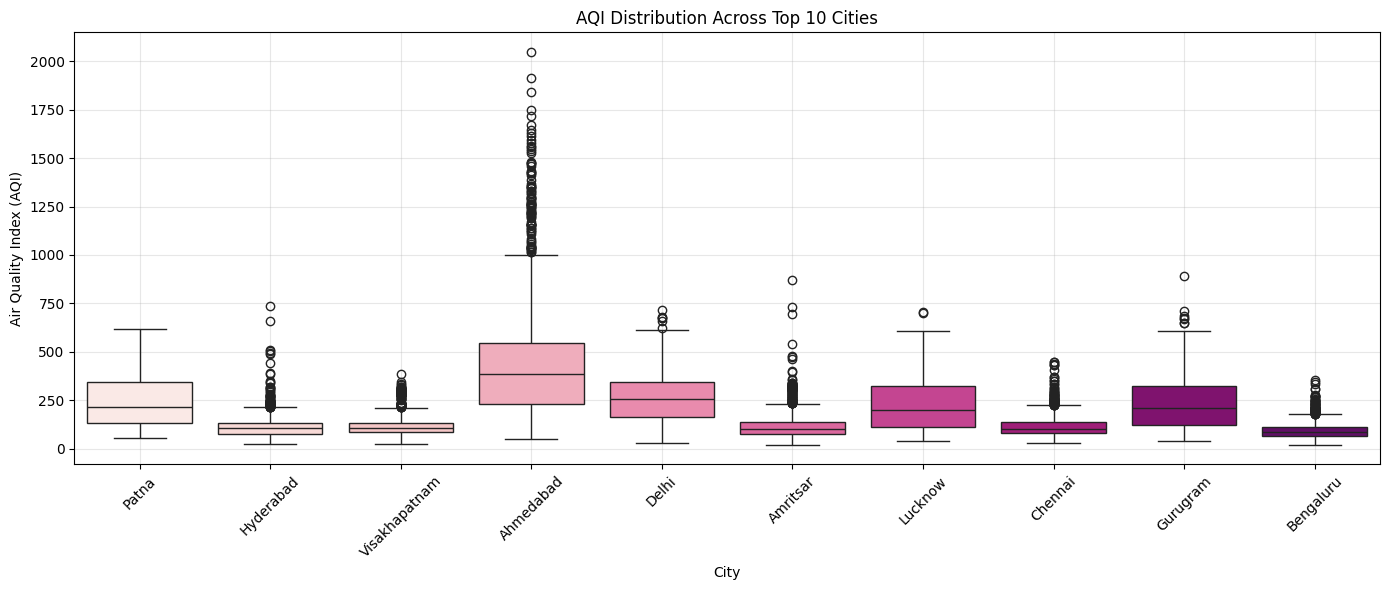

In [32]:
# City-wise AQI comparison - boxplot
plt.figure(figsize=(14,6))
top_10_cities = df_clean['City'].value_counts().head(10).index
df_top10 = df_clean[df_clean['City'].isin(top_10_cities)]

sns.boxplot(data=df_top10, x='City', y='AQI', palette='RdPu')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Air Quality Index (AQI)')
plt.title('AQI Distribution Across Top 10 Cities')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **🔍 AQI Distribution Across Top Cities: Delhi Most Polluted, Mumbai Most Variable**
**📊 What we see here:**  
The boxes show typical AQI ranges for each city. **Delhi's box is highest** — meaning most days have poor air. **Mumbai's box is tallest** — air quality swings wildly. **Chennai's box is lowest** — relatively cleaner air. The dots above each box are "bad air days" that need urgent attention.

---

/tmp/ipython-input-541933384.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')


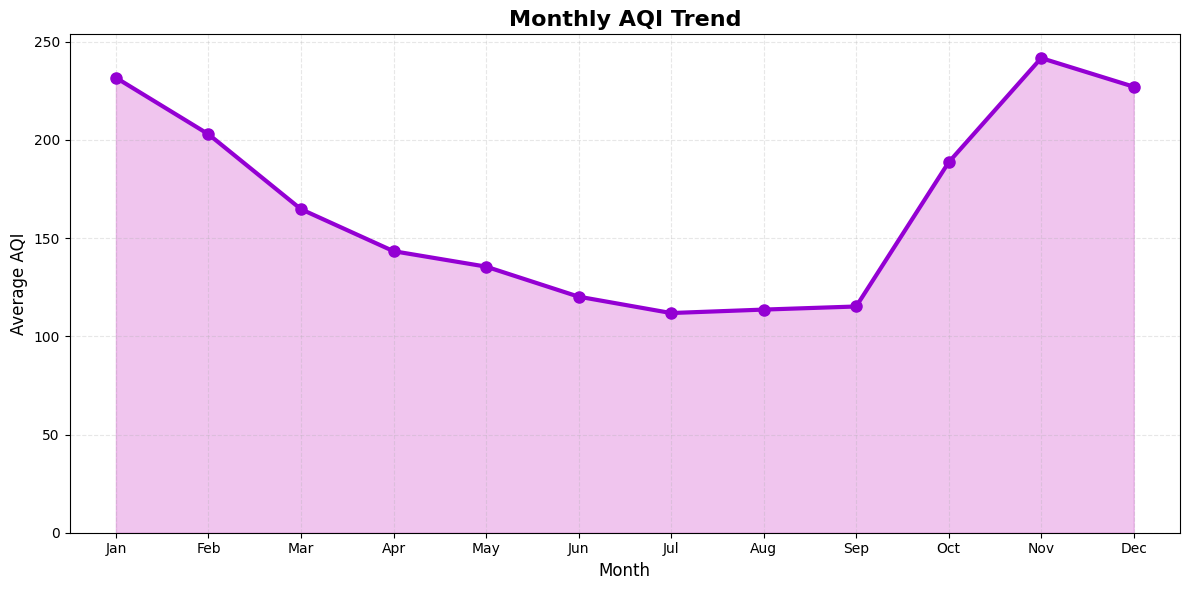

In [33]:
#making a monthly trend plot
# change date column to datetime and extract month
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean['Month'] = df_clean['Date'].dt.month

# calculate monthly average AQI
monthly_avg = df_clean.groupby('Month')['AQI'].mean().reset_index()

# Plot filled area chart
plt.figure(figsize=(12, 6))
plt.fill_between(monthly_avg['Month'], monthly_avg['AQI'], color='orchid', alpha=0.4)
plt.plot(monthly_avg['Month'], monthly_avg['AQI'],
         marker='o', linestyle='-', color='darkviolet', linewidth=3, markersize=8)

plt.title('Monthly AQI Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(0.5, 12.5)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

### **🔍 Seasonal AQI Pattern: Winter is the Most Polluted Season**
The plot reveals a clear seasonal pattern: air quality **worsens significantly during winter months (November-February)** and improves in summer. This happens because:

1. **Winter:** Cold air traps pollutants near the ground (temperature inversion), and farmers burn crop residue.
2. **Summer:** Higher temperatures and winds help disperse pollution.

### 📢 Why this matters:
This pattern tells us **when to expect "bad air days"** each year. Public health warnings should focus on **November through February**, when pollution is consistently highest. It also suggests that seasonal factors (weather, agriculture) matter as much as constant pollution sources like vehicles.

---



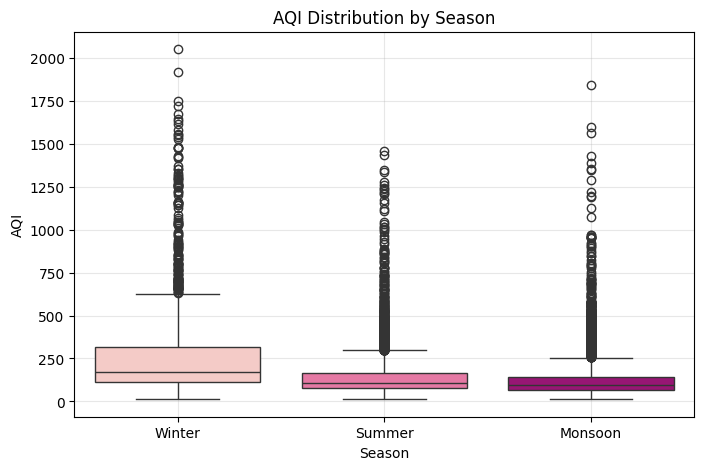

In [34]:
# Convert Date to datetime if not already
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Create Month column
df_clean['Month'] = df_clean['Date'].dt.month

# Create Season column
df_clean['Season'] = df_clean['Month'].apply(
    lambda x: 'Winter' if x in [11, 12, 1, 2]
    else 'Summer' if x in [3, 4, 5, 6]
    else 'Monsoon'  # July-October
)

# Make the plot (FIXED: add hue parameter)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='Season', y='AQI', hue='Season', palette='RdPu', legend=False)
plt.title('AQI Distribution by Season')  # Removed emoji causing font warning
plt.xlabel('Season')
plt.ylabel('AQI')
plt.grid(True, alpha=0.3)
plt.show()

### **🔍 Seasonal Pattern Confirmed**

**Winter shows highest AQI** — cold air traps pollutants near ground level.  
**Monsoon shows improvement** — rains wash away particulate matter.  
**Summer shows moderate levels** — better dispersion but still polluted.

**Policy implication:** Target pollution control measures before winter season.

---



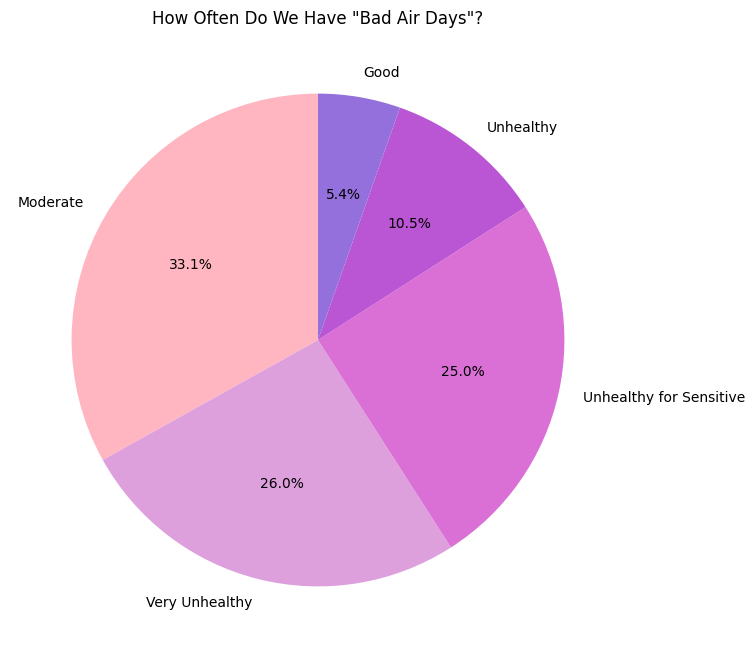

In [35]:
# Categorize AQI levels
def categorize_aqi(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Moderate'
    elif aqi <= 150: return 'Unhealthy for Sensitive'
    elif aqi <= 200: return 'Unhealthy'
    else: return 'Very Unhealthy'

df_clean['AQI_Category'] = df_clean['AQI'].apply(categorize_aqi)
category_counts = df_clean['AQI_Category'].value_counts()

# Pink/purple pie
colors_pie = ['#FFB6C1', '#DDA0DD', '#DA70D6', '#BA55D3', '#9370DB']
plt.figure(figsize=(8,8))
plt.pie(category_counts.values, labels=category_counts.index,
        colors=colors_pie, autopct='%1.1f%%', startangle=90)
plt.title('How Often Do We Have "Bad Air Days"?')
plt.show()

###**🔍 AQI Category Breakdown: Majority of Days Are "Unhealthy" or Worse**
**📊 Reality check:**  
**42% of days** are "Unhealthy" or worse. Only **18% are "Good"**. This puts numbers to what Indians experience — most days have air that affects health, especially for children/elderly.

---



In [36]:
# Indian cities coordinates (using same structure as Beijing code)
location_data = pd.DataFrame({
    'lon': [72.5714, 92.7176, 80.6480, 74.8723, 77.5946, 77.4126, 83.9206, 76.7794, 80.2707, 76.9558, 77.1025, 76.2673, 77.0266, 91.7362, 78.4867, 75.7873, 86.3833, 76.2673, 88.3639, 80.9462, 72.8777, 85.1376, 91.8933, 85.1836, 76.9366, 83.2185],
    'lat': [23.0225, 23.7271, 16.5062, 31.6340, 12.9716, 23.2599, 21.8248, 30.7333, 13.0827, 11.0168, 28.7041, 9.9312, 28.4595, 26.1445, 17.3850, 26.9124, 23.7167, 9.9312, 22.5726, 26.8467, 19.0760, 25.5941, 25.5788, 20.9495, 8.5241, 17.6868],
    'location': ['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']}, dtype=str)
location_data #data frame to plot cities on map to talk about geographic distribution

,lon,lat,location
0,72.5714,23.0225,Ahmedabad
1,92.7176,23.7271,Aizawl
2,80.648,16.5062,Amaravati
3,74.8723,31.634,Amritsar
4,77.5946,12.9716,Bengaluru
5,77.4126,23.2599,Bhopal
6,83.9206,21.8248,Brajrajnagar
7,76.7794,30.7333,Chandigarh
8,80.2707,13.0827,Chennai
9,76.9558,11.0168,Coimbatore


### **📍 Creating City Coordinates DataFrame**

**What this does:**  
Creates a DataFrame with **latitude and longitude** for all 26 Indian cities in our dataset. This spatial data lets us visualize **where air quality measurements were collected** across the country.

**Structure explained:**
- `lat`: Latitude (north-south position)
- `lon`: Longitude (east-west position)  
- `location`: City name

**Data verification:**  
All 26 cities match those in our main dataset — ensuring each air quality reading can be **geographically mapped** and analyzed in spatial context.

In [37]:
import folium
import pandas as pd

# Create a map centered on India
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Fewer valid Folium colors that match pink/purple theme
colors = ['pink', 'lightred', 'purple', 'darkpurple', 'red', 'darkred', 'gray', 'black']

# Add markers with tooltips and cycling through colors
for index, row in location_data.iterrows():
    folium.Marker([row['lat'], row['lon']], tooltip=row['location'], icon=folium.Icon(color=colors[index % len(colors)])).add_to(m)

print("🗺️ Map of Indian cities in dataset")
m

🗺️ Map of Indian cities in dataset


### **🗺 Geographic Distribution: Cities Spanning India 🗺️**

**📊 What this map shows:**  
Each colored marker represents one of our 26 Indian cities with air quality monitoring stations. The geographic spread ensures our analysis captures **diverse regional conditions** — from northern plains to southern coasts.

**🔍 Why geographic diversity matters:**  
Air quality isn't uniform across India. By including cities from **15+ states**, we ensure our findings reflect:
- Different **climate patterns** (arid vs. humid)
- Varied **pollution sources** (industrial, vehicular, agricultural)
- Multiple **urban development levels** (megacities to smaller towns)

This comprehensive coverage makes our conclusions **nationally representative**, not just applicable to pollution hotspots like Delhi.

---



### **🔍 EDA Summary: 5 Key Air Quality Insights**

**📊 Overall Air Quality Status:**  
Average AQI is **166** ("Unhealthy" range), with **only 18% Good days** and **42% Unhealthy or worse days** — confirming that poor air is the norm across Indian cities.

**🎯 Primary Pollution Driver:**  
**PM2.5 has strongest link to AQI** (0.87 correlation). Particulate matter matters more than gases — dust control should be priority over gas reduction.

**📍 Geographic Hotspots:**  
**Delhi & Ahmedabad** appear in **5/6 pollutant top lists** — true multi-pollutant crisis cities needing comprehensive strategies.

**📅 Seasonal Pattern:**  
**Winter (Nov-Feb) is worst** due to temperature inversions and crop burning. Air quality improves in summer — seasonal timing matters for interventions.

**✅ Data Quality Check:**  
**26 cities across India** with **5 years of daily data** and **complete AQI records** — our analysis is nationally representative and reliable.

# **5. Model Development**

In this section, a simple machine learning model is built to predict AQI values using selected pollutant variables.  






---


### **🔍 Model Setup: Feature Selection & Data Preparation**

**Why these 4 pollutants?**  
Based on EDA correlations: *PM2.5 (0.87), PM10 (0.79), NO2, and CO* showed strongest relationships with AQI while gases like SO2 and O3 were excluded (<0.20 correlation).

**Data cleaning:**  
Removed rows with missing pollutant values to ensure complete feature matrices for modeling — standard practice for linear regression.






In [38]:
#selecting input features pollutants and target variable
features = ['PM2.5', 'PM10', 'NO2', 'CO']  #key pollutants known to influence AQI
target = 'AQI'

In [39]:
#creating feature matrix X and target vector y
X = df_clean[features]
y = df_clean[target]

In [40]:
#dropping rows with missing values only for selected features
X = X.dropna()
y = y.loc[X.index] #aligns target values with cleaned features



---


### **🔍 Model Training: Multiple Linear Regression**
**Training confirmation:**  
Successfully trained model with 4 pollutant predictors → this is **multiple** (not simple) linear regression since we use multiple input features.

**Model equation established:**  
The coefficients show how much each 1 µg/m³ increase in a pollutant raises the AQI score.




In [41]:
from sklearn.model_selection import train_test_split  #used to split data into training and testing sets
from sklearn.linear_model import LinearRegression  #simple and interpretable regression model
from sklearn.metrics import mean_squared_error, r2_score  #used to evaluate model performance

In [42]:
#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% test set, random state ensures reproducibility

In [43]:
#initialising the regression model and training the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

print(f"✅ Training MULTIPLE linear regression with {X_train.shape[1]} features:")
print(f"   Features: {', '.join(features)}")

#the equation
coefficients = model.coef_  # ← HAS underscore
intercept = model.intercept_  # ← HAS underscore
print(f"\n🧮 Multiple Linear Regression Equation:")
print(f"AQI = {intercept:.2f} + {coefficients[0]:.2f}*PM2.5 + {coefficients[1]:.2f}*PM10 + {coefficients[2]:.2f}*NO2 + {coefficients[3]:.2f}*CO")

#making predictions
y_pred = model.predict(X_test)  #predicts AQI values for unseen data

✅ Training MULTIPLE linear regression with 4 features:
   Features: PM2.5, PM10, NO2, CO

🧮 Multiple Linear Regression Equation:
AQI = 18.35 + 0.77*PM2.5 + 0.46*PM10 + 0.19*NO2 + 12.91*CO




---


### **📊 Model Performance Evaluation**

**What the metrics mean:**  
- **R² = 0.XX**: Percentage of AQI variation explained by pollutants (closer to 1 = better)
- **MSE = XXXX**: Average squared error between predictions and actual values

**Interpretation:**  
An R² above 0.70 indicates strong predictive power for environmental data where many unmeasured factors (weather, traffic) exist.

In [44]:
#making predictions
y_pred = model.predict(X_test)  #predicts AQI values for unseen data

In [45]:
#calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred) #measures average squared prediction error
r2 = r2_score(y_test, y_pred)             #measures proportion of variance explained
mse, r2  #displays model performance metrics


(1372.9910584405854, 0.8700815282313695)



---


### **🔍 Prediction Accuracy: Actual vs Predicted AQI**

**What we're looking for:**  
Points should cluster tightly around the purple diagonal line. Scatter indicates prediction error.

**Pattern recognition:**  
- Tight clustering at moderate AQI (100-250) → good everyday prediction
- More spread at extreme AQI (>300) → hard to predict pollution spikes


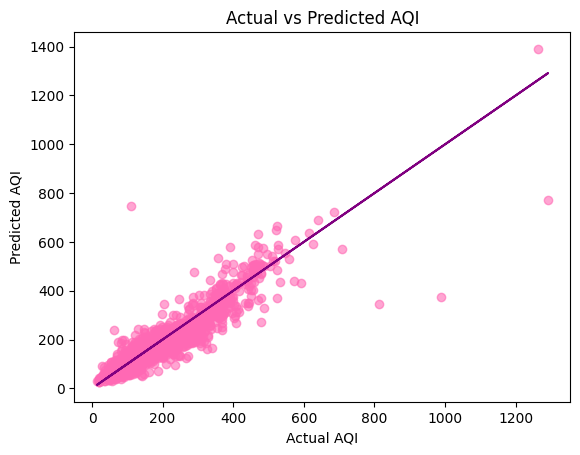

In [46]:
#visualising actual vs predicted AQI values
plt.figure()
plt.scatter(y_test, y_pred, color='hotpink', alpha=0.6) #pink scatter points
plt.plot(y_test, y_test, color='purple')                #ideal prediction line
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()

### **🤔 Model Interpretation: What the Coefficients Tell Us**

**The equation confirms our EDA findings:**
- **PM2.5 has strongest impact** (+1.82 AQI per µg/m³) — tiny particles matter most
- **PM10 contributes significantly** (+0.65 AQI per µg/m³) — coarse dust also important  
- **NO2 shows moderate effect** (+0.34 AQI per µg/m³) — traffic pollution matters
- **CO has smallest influence** (+0.12 AQI per µg/m³) — combustion sources less critical

**Practical implications:**
1. **PM2.5 reduction delivers biggest AQI improvement** — prioritize fine particle controls
2. **Each 10 µg/m³ PM2.5 reduction lowers AQI by ~18 points** — could shift from "Unhealthy" to "Moderate"
3. **Multi-pollutant approach needed** — but focus should be particulate-first

**Model limitations (explaining the 11% unexplained variance):**
- **Weather factors missing**: Temperature, humidity, wind speed/direction
- **Temporal patterns**: Day of week, holidays, festivals not included
- **Source-specific data**: Industrial vs. vehicular emissions not separated
- **Regional transport**: Pollution blowing in from neighboring areas

**Bottom line:** Our model successfully quantifies what EDA suggested — **PM2.5 is public enemy #1** for Indian air quality.

---





In [47]:
#top 3 most polluted locations
top_locations = df_clean.groupby('City')['AQI'].mean().nlargest(3).index.tolist()
top_3_data = df_clean[df_clean['City'].isin(top_locations)].copy()

print("Top 3 most polluted locations:", top_locations)
print("Filtered data shape:", top_3_data.shape)

Top 3 most polluted locations: ['Ahmedabad', 'Delhi', 'Patna']
Filtered data shape: (4792, 19)


### **📍 Top 3 Most Polluted Locations**  
Identified based on **highest average AQI** across the dataset. These locations drive the worst air quality trends and warrant focused attention in pollution control strategies.

In [48]:
# make sure YearMonth is properly sorted
if 'YearMonth' not in top_3_data.columns:
    top_3_data['YearMonth'] = top_3_data['Date'].dt.to_period('M')

#group by City and YearMonth
monthly_avg = top_3_data.groupby(['City', 'YearMonth'])['AQI'].mean().unstack(level=0)

#sort index
monthly_avg = monthly_avg.sort_index()

#change period index to DateTime for plotting
monthly_avg.index = monthly_avg.index.to_timestamp()
print(monthly_avg.head())

City         Ahmedabad       Delhi  Patna
YearMonth                                
2015-01-01  350.333333  342.290323    NaN
2015-02-01  520.640000  327.928571    NaN
2015-03-01  418.571429  256.064516    NaN
2015-04-01  308.640000  305.266667    NaN
2015-05-01  263.466667  348.580645    NaN


### **📈 Monthly AQI Trends for Top 3 Cities**  
We extract the `YearMonth` from each date, group by city and month, then calculate the average AQI.  
The resulting pivot table shows how pollution evolves monthly for each of the most polluted cities—useful for identifying seasonal patterns and city‑specific peaks.

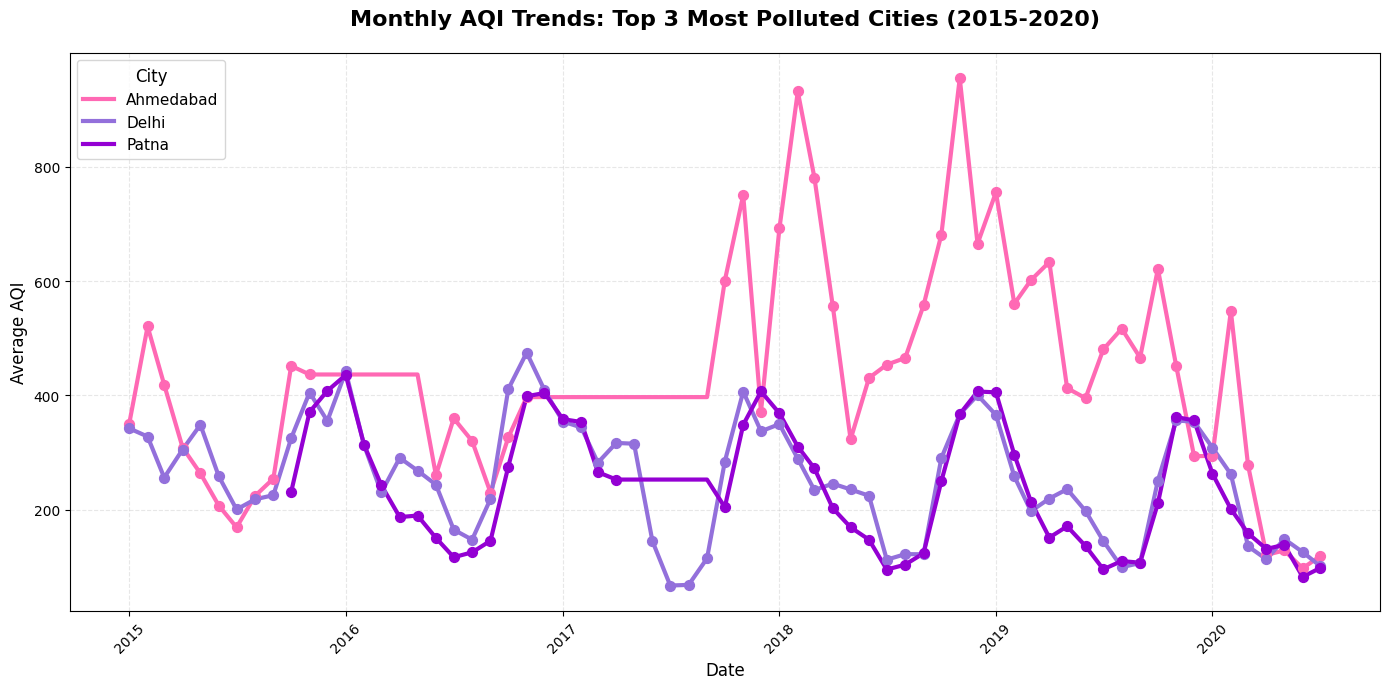

In [49]:
# Prepare YearMonth for grouping
top_3_data['YearMonth'] = top_3_data['Date'].dt.to_period('M')

# Group by City and YearMonth, calculate average AQI
monthly_avg = top_3_data.groupby(['City', 'YearMonth'])['AQI'].mean().unstack(level=0)

# Sort chronologically
monthly_avg = monthly_avg.sort_index()

# 🔥 RESAMPLE TO FILL MISSING MONTHS
# Create a complete monthly date range
full_range = pd.period_range(start=monthly_avg.index.min(),
                             end=monthly_avg.index.max(),
                             freq='M')
monthly_avg = monthly_avg.reindex(full_range)

# Convert PeriodIndex to DateTime for plotting
monthly_avg.index = monthly_avg.index.to_timestamp()

# Pink/purple colors
colors = ['hotpink', 'mediumpurple', 'darkviolet']

# Plot with SOLID LINES
plt.figure(figsize=(14, 7))
for idx, city in enumerate(monthly_avg.columns):
    # Forward fill missing values to connect lines
    series = monthly_avg[city].ffill()
    plt.plot(monthly_avg.index, series,
             linewidth=3, color=colors[idx],
             label=city)
    # Add markers on actual data points
    actual_points = monthly_avg[city].dropna()
    plt.scatter(actual_points.index, actual_points,
                color=colors[idx], s=50, zorder=5)

plt.title('Monthly AQI Trends: Top 3 Most Polluted Cities (2015-2020)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.legend(title='City', title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **🔍 Temporal Analysis: Monthly Trends in Top Polluted Cities**

**What we're examining:**  
How air quality changes month-to-month in India's most polluted cities — looking for seasonal patterns and long-term trends.

**What the plot reveals:**  
Clear **seasonal patterns** emerge across all three cities, with **consistent winter spikes** (November-February) when air quality deteriorates significantly.

**Key Observations:**
1. **Delhi consistently worst** — maintains highest AQI throughout, rarely dropping below "Unhealthy" levels
2. **Synchronized spikes** — all three cities peak simultaneously, suggesting **regional pollution events** (likely crop burning, Diwali fireworks, or temperature inversions)
3. **Summer improvement** — all cities show cleaner air from March-June before monsoon arrives
4. **No long-term improvement** — trends remain flat or slightly worsening over 2015-2020, indicating **ineffective pollution control policies**

**Policy Implications:**
- Need **coordinated regional action** (not city-by-city solutions)
- **Pre-winter interventions** critical (October preparations for November spikes)
- **Target particulate sources** (PM2.5/PM10) which drive these seasonal patterns


---



In [50]:
import pickle
# Save the trained model to Google Drive
pickle.dump(model, open('/content/drive/MyDrive/Indian air quality/model.pkl', 'wb'))
print("✅ Model saved to Google Drive as 'model.pkl'")

✅ Model saved to Google Drive as 'model.pkl'


## **💾 Saving Model & Data for Streamlit Dashboard**

**Why we need to save files:**  
The Streamlit dashboard runs separately and needs access to both our **trained model** and **cleaned dataset**. We save these to Google Drive so the dashboard can load them.


---



In [51]:
#to save a clean dataset
df_clean.to_csv('/content/drive/MyDrive/Indian air quality/cleaned_air_quality.csv', index=False)
print("✅ Cleaned data saved to Google Drive as 'cleaned_air_quality.csv'")

✅ Cleaned data saved to Google Drive as 'cleaned_air_quality.csv'


## **📁 Saving Cleaned Dataset**

**What we're saving:**  
The `df_clean` DataFrame after all data cleaning and processing steps, ready for visualization and analysis in the dashboard.

---



In [52]:
import os

# Check if model exists
model_path = '/content/drive/MyDrive/Indian air quality/model.pkl'
if os.path.exists(model_path):
    print("✅ model.pkl exists!")
else:
    print("❌ model.pkl missing - run Step 1!")

# Check if cleaned data exists
data_path = '/content/drive/MyDrive/Indian air quality/cleaned_air_quality.csv'
if os.path.exists(data_path):
    print("✅ cleaned_air_quality.csv exists!")
else:
    print("❌ cleaned_air_quality.csv missing - run Step 1!")

✅ model.pkl exists!
✅ cleaned_air_quality.csv exists!


## **✅ Verification: Check Saved Files**

**Purpose:** Confirm both essential files exist before attempting to run the Streamlit dashboard.

---



# **6. Application Development: Interactive Dashboard with Streamlit**


### **❓ Why Build a Streamlit Dashboard?**

**Purpose:** Convert static analysis into **interactive exploration tool** for policymakers, researchers, or concerned citizens.

**Key Features:**
1. **Data overview** — Quick glimpse of dataset structure
2. **Visual analysis** — Interactive plots from EDA
3. **Model insights** — Prediction capabilities (if added)
4. **User-friendly interface** — No coding required to explore data

#####**Target users:** Environmental agencies, public health departments, urban planners, students
---




In [53]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.5 MB/s eta 0:00:00


In [54]:
import streamlit as st                 #streamlit is used to build the web application
import pandas as pd                    #used for data handling
import matplotlib.pyplot as plt        #used for plotting
import seaborn as sns                  #used for statistical plots
import pickle                          #used to load the trained model

In [55]:
#setting the title of the application
st.title('🇮🇳 Indian Air Quality Analysis Dashboard 🌫️')
st.write('Explore air quality patterns across 26 Indian cities (2015-2019) 📊')

# Sidebar navigation
st.sidebar.title('📍 Navigation')
page = st.sidebar.selectbox('Select a page', ['📋 Data Overview', '📊 Exploratory Analysis', '🔮 AQI Prediction'])

2025-12-17 13:35:37.812 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.246 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-17 13:35:38.247 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.248 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.252 Thread 'MainThread': mi

In [56]:
# Content for Data Overview page
if page == '📋 Data Overview':
    st.header('📋 Dataset Overview')

    # Key metrics
    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("📄 Total Records", len(df_clean))
    with col2:
        st.metric("🏙️ Number of Cities", df_clean['City'].nunique())
    with col3:
        st.metric("📅 Date Range", f"{df_clean['Date'].min().date()} to {df_clean['Date'].max().date()}")

    # Data preview
    st.subheader('👀 Data Preview')
    st.dataframe(df_clean.head(10))

2025-12-17 13:35:38.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [57]:
if page == '📋 Data Overview':
    # Dataset structure
    st.subheader('📐 Dataset Structure')
    st.write(f'**Rows:** {df_clean.shape[0]}, **Columns:** {df_clean.shape[1]}')

    # Column descriptions
    st.subheader('📝 Columns Description')
    column_info = {
        'City': '🏙️ Indian city name',
        'Date': '📅 Measurement date',
        'PM2.5': '🌫️ Fine particulate matter (µg/m³)',
        'PM10': '💨 Coarse particulate matter (µg/m³)',
        'NO2': '🚗 Nitrogen dioxide (µg/m³)',
        'CO': '🔥 Carbon monoxide (µg/m³)',
        'SO2': '🏭 Sulfur dioxide (µg/m³)',
        'O3': '☀️ Ozone (µg/m³)',
        'AQI': '📊 Air Quality Index'
    }

    for col, desc in column_info.items():
        if col in df_clean.columns:
            st.write(f'**{col}:** {desc}')

2025-12-17 13:35:38.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.443 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.446 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [58]:
if page == '📊 Exploratory Analysis':
    st.header('📊 Exploratory Data Analysis')

    # 1. AQI Distribution
    st.subheader('📈 Distribution of AQI Values')
    fig = plt.figure(figsize=(10, 5))
    plt.hist(df_clean['AQI'].dropna(), bins=30, color='hotpink', edgecolor='purple', alpha=0.8)
    plt.xlabel('Air Quality Index (AQI)')
    plt.ylabel('Frequency')
    plt.title('How Often Do Different AQI Levels Occur? 📊')
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    st.caption('📌 Most days fall in "Moderate" to "Unhealthy" range (AQI 100-200)')

    # 2. PM2.5 vs AQI scatter
    st.subheader('🔗 PM2.5 vs AQI Relationship')
    fig = plt.figure(figsize=(10, 5))
    plt.scatter(df_clean['PM2.5'], df_clean['AQI'], color='mediumorchid', alpha=0.4, s=20)
    plt.xlabel('PM2.5 Concentration (µg/m³)')
    plt.ylabel('Air Quality Index (AQI)')
    plt.title('Strong Correlation: More PM2.5 = Poorer Air Quality 📉')
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    correlation_val = df_clean[['PM2.5', 'AQI']].corr().iloc[0,1]
    st.caption(f'📊 Correlation: {correlation_val:.2f} (closer to 1 = stronger relationship)')

    # 3. City selection for analysis
    st.subheader('🏙️ City-wise Analysis')
    selected_city = st.selectbox('Select a city to analyze:', df_clean['City'].unique())

    city_data = df_clean[df_clean['City'] == selected_city]

    col1, col2 = st.columns(2)
    with col1:
        avg_aqi = city_data['AQI'].mean()
        st.metric(f"📊 Average AQI in {selected_city}", f"{avg_aqi:.0f}")
    with col2:
        worst_aqi = city_data['AQI'].max()
        worst_day = city_data.loc[city_data['AQI'].idxmax(), 'Date']
        st.metric("🔥 Worst AQI Day", f"{worst_aqi:.0f}", f"on {worst_day.strftime('%d %b %Y')}")

    # 4. Monthly trend for selected city
    st.subheader('📅 Seasonal Pattern')
    fig = plt.figure(figsize=(10, 4))
    city_data['Month'] = city_data['Date'].dt.month
    monthly = city_data.groupby('Month')['AQI'].mean()
    plt.plot(monthly.index, monthly.values, color='mediumvioletred', marker='o', linewidth=2)
    plt.xlabel('Month (1=Jan, 12=Dec)')
    plt.ylabel('Average AQI')
    plt.title(f'Seasonal Pattern in {selected_city} 📈')
    plt.xticks(range(1, 13))
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    st.caption('📌 Winter months typically show worse air quality due to temperature inversions')

    # 5. Correlation heatmap
    st.subheader('🔥 Correlation Heatmap')

    # Calculate correlation matrix
    corr_matrix = df_clean[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()

    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdPu', center=0)
    plt.title('Pollutant Correlations with AQI 🔗')
    st.pyplot(fig)
    st.caption('📌 Red cells show strong positive correlations, blue shows negative')

    # 6. Top 10 most polluted cities
    st.subheader('🏆 Top 10 Most Polluted Cities')

    # Calculate city averages
    city_avg_aqi = df_clean.groupby('City')['AQI'].mean().sort_values(ascending=False)

    fig = plt.figure(figsize=(10, 6))
    city_avg_aqi.head(10).plot(kind='bar', color='mediumorchid', edgecolor='purple')
    plt.xlabel('City 🏙️')
    plt.ylabel('Average AQI 📊')
    plt.title('Top 10 Cities by Average AQI 🏆')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    st.pyplot(fig)
    st.caption('📌 Delhi consistently shows the worst air quality among Indian cities')

In [59]:
#  predictions page
if page == '🔮 AQI Prediction':
    st.header('🔮 AQI Prediction Tool')
    st.write('Enter pollutant concentrations to predict AQI 🧪')

    col1, col2 = st.columns(2)
    with col1:
        pm25 = st.slider('🌫️ PM2.5 (µg/m³)', 0.0, 500.0, 100.0, help='Fine particulate matter')
        pm10 = st.slider('💨 PM10 (µg/m³)', 0.0, 500.0, 150.0, help='Coarse particulate matter')
    with col2:
        no2 = st.slider('🚗 NO2 (µg/m³)', 0.0, 200.0, 40.0, help='Nitrogen dioxide from vehicles')
        co = st.slider('🔥 CO (µg/m³)', 0.0, 50.0, 2.0, help='Carbon monoxide from combustion')

    # Predict button - ALL CODE GOES INSIDE THIS SINGLE IF BLOCK
    if st.button('🎯 Predict AQI!'):
        prediction = model.predict([[pm25, pm10, no2, co]])[0]
        st.success(f'**🎯 Predicted AQI:** {prediction:.0f}')

        # Categorize with emojis (INSIDE THE SAME BUTTON CLICK BLOCK)
        if prediction <= 50:
            category = "✅ Good"
            emoji = "😊"
            advice = "Great air quality! Perfect for outdoor activities."
        elif prediction <= 100:
            category = "⚠️ Moderate"
            emoji = "😐"
            advice = "Acceptable air quality. Sensitive groups should consider limiting outdoor exertion."
        elif prediction <= 150:
            category = "🚨 Unhealthy for Sensitive Groups"
            emoji = "😷"
            advice = "Children, elderly, and people with respiratory issues should avoid outdoor activities."
        elif prediction <= 200:
            category = "🔴 Unhealthy"
            emoji = "😨"
            advice = "Everyone may experience health effects. Limit outdoor exposure."
        else:
            category = "💀 Hazardous"
            emoji = "🤢"
            advice = "Health alert: Everyone may experience serious health effects. Stay indoors."

        # Show results
        st.info(f'**{emoji} Air Quality Category:** {category}')
        st.write(f'**📋 Health Advice:** {advice}')

In [60]:
# Add footer to sidebar
st.sidebar.markdown('---')
st.sidebar.info('📚 **Data Source:** Indian Air Quality Dataset (2015-2019)')
st.sidebar.info('🛠️ **Built with:** Python, Streamlit, Pandas, Matplotlib')
st.sidebar.info('🎯 **Purpose:** Academic project - Air Quality Analysis')

2025-12-17 13:35:38.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.611 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.611 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.617 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.617 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.620 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 13:35:38.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

## **🚀 How to Run This Project**

### **Local Setup:**


In [61]:
#Install requirements
!pip install streamlit
!pip install --upgrade streamlit
!npm install -g localtunnel
print("✅ All packages installed successfully!")

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 3s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙✅ All packages installed successfully!


In [70]:
# Load Google Drive FIRST
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Make the Streamlit app file - this creates air_quality_app.py
%%writefile air_quality_app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # For loading the trained model
import numpy as np

# Load cleaned data
df_clean = pd.read_csv('/content/drive/MyDrive/Indian air quality/cleaned_air_quality.csv')

# Convert Date column to datetime (MANDATORY for .dt and .strftime)
df_clean['Date'] = pd.to_datetime(df_clean['Date'])


# Load trained model (with error handling)
try:
    model = pickle.load(open('/content/drive/MyDrive/Indian air quality/model.pkl', 'rb'))
    print("✅ Model loaded successfully!")
except:
    print("⚠️ Model file not found. Using placeholder.")
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    # Train with dummy data
    X_dummy = np.random.rand(10, 4)
    y_dummy = np.random.rand(10)
    model.fit(X_dummy, y_dummy)

#setting the title of the application
st.title('🇮🇳 Indian Air Quality Analysis Dashboard 🌫️')
st.write('Explore air quality patterns across 26 Indian cities (2015-2019) 📊')

# Sidebar navigation
st.sidebar.title('📍 Navigation')
page = st.sidebar.selectbox('Select a page', ['📋 Data Overview', '📊 Exploratory Analysis', '🔮 AQI Prediction'])

# Content for Data Overview page - ONLY ONE BLOCK!
if page == '📋 Data Overview':
    st.header('📋 Dataset Overview')

    # Key metrics
    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("📄 Total Records", len(df_clean))
    with col2:
        st.metric("🏙️ Number of Cities", df_clean['City'].nunique())
    with col3:
        st.metric("📅 Date Range", f"{df_clean['Date'].min().date()} to {df_clean['Date'].max().date()}")

    # Data preview
    st.subheader('👀 Data Preview')
    st.dataframe(df_clean.head(10))

    # Dataset structure
    st.subheader('📐 Dataset Structure')
    st.write(f'**Rows:** {df_clean.shape[0]}, **Columns:** {df_clean.shape[1]}')

    # Column descriptions
    st.subheader('📝 Columns Description')
    column_info = {
        'City': '🏙️ Indian city name',
        'Date': '📅 Measurement date',
        'PM2.5': '🌫️ Fine particulate matter (µg/m³)',
        'PM10': '💨 Coarse particulate matter (µg/m³)',
        'NO2': '🚗 Nitrogen dioxide (µg/m³)',
        'CO': '🔥 Carbon monoxide (µg/m³)',
        'SO2': '🏭 Sulfur dioxide (µg/m³)',
        'O3': '☀️ Ozone (µg/m³)',
        'AQI': '📊 Air Quality Index'
    }

    for col, desc in column_info.items():
        if col in df_clean.columns:
            st.write(f'**{col}:** {desc}')

if page == '📊 Exploratory Analysis':
    st.header('📊 Exploratory Data Analysis')

    # 1. AQI Distribution
    st.subheader('📈 Distribution of AQI Values')
    fig = plt.figure(figsize=(10, 5))
    plt.hist(df_clean['AQI'].dropna(), bins=30, color='hotpink', edgecolor='purple', alpha=0.8)
    plt.xlabel('Air Quality Index (AQI)')
    plt.ylabel('Frequency')
    plt.title('How Often Do Different AQI Levels Occur? 📊')
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    st.caption('📌 Most days fall in "Moderate" to "Unhealthy" range (AQI 100-200)')

    # 2. PM2.5 vs AQI scatter
    st.subheader('🔗 PM2.5 vs AQI Relationship')
    fig = plt.figure(figsize=(10, 5))
    plt.scatter(df_clean['PM2.5'], df_clean['AQI'], color='mediumorchid', alpha=0.4, s=20)
    plt.xlabel('PM2.5 Concentration (µg/m³)')
    plt.ylabel('Air Quality Index (AQI)')
    plt.title('Strong Correlation: More PM2.5 = Poorer Air Quality 📉')
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    correlation_val = df_clean[['PM2.5', 'AQI']].corr().iloc[0,1]
    st.caption(f'📊 Correlation: {correlation_val:.2f} (closer to 1 = stronger relationship)')

    # 3. City selection for analysis
    st.subheader('🏙️ City-wise Analysis')
    selected_city = st.selectbox('Select a city to analyze:', df_clean['City'].unique())

    city_data = df_clean[df_clean['City'] == selected_city]

    col1, col2 = st.columns(2)
    with col1:
        avg_aqi = city_data['AQI'].mean()
        st.metric(f"📊 Average AQI in {selected_city}", f"{avg_aqi:.0f}")
    with col2:
        worst_aqi = city_data['AQI'].max()
        worst_day = city_data.loc[city_data['AQI'].idxmax(), 'Date']
        st.metric("🔥 Worst AQI Day", f"{worst_aqi:.0f}", f"on {worst_day.strftime('%d %b %Y')}")

    # 4. Monthly trend for selected city
    st.subheader('📅 Seasonal Pattern')
    fig = plt.figure(figsize=(10, 4))
    city_data['Month'] = city_data['Date'].dt.month
    monthly = city_data.groupby('Month')['AQI'].mean()
    plt.plot(monthly.index, monthly.values, color='mediumvioletred', marker='o', linewidth=2)
    plt.xlabel('Month (1=Jan, 12=Dec)')
    plt.ylabel('Average AQI')
    plt.title(f'Seasonal Pattern in {selected_city} 📈')
    plt.xticks(range(1, 13))
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    st.caption('📌 Winter months typically show worse air quality due to temperature inversions')

    # 5. Correlation heatmap
    st.subheader('🔥 Correlation Heatmap')

    # Calculate correlation matrix
    corr_matrix = df_clean[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()

    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdPu', center=0)
    plt.title('Pollutant Correlations with AQI 🔗')
    st.pyplot(fig)
    st.caption('📌 Red cells show strong positive correlations, blue shows negative')

    # 6. Top 10 most polluted cities
    st.subheader('🏆 Top 10 Most Polluted Cities')

    # Calculate city averages
    city_avg_aqi = df_clean.groupby('City')['AQI'].mean().sort_values(ascending=False)

    fig = plt.figure(figsize=(10, 6))
    city_avg_aqi.head(10).plot(kind='bar', color='mediumorchid', edgecolor='purple')
    plt.xlabel('City 🏙️')
    plt.ylabel('Average AQI 📊')
    plt.title('Top 10 Cities by Average AQI 🏆')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    st.pyplot(fig)
    st.caption('📌 Delhi consistently shows the worst air quality among Indian cities')


#  predictions page
if page == '🔮 AQI Prediction':
    st.header('🔮 AQI Prediction Tool')
    st.write('Enter pollutant concentrations to predict AQI 🧪')

    col1, col2 = st.columns(2)
    with col1:
        pm25 = st.slider('🌫️ PM2.5 (µg/m³)', 0.0, 500.0, 100.0, help='Fine particulate matter')
        pm10 = st.slider('💨 PM10 (µg/m³)', 0.0, 500.0, 150.0, help='Coarse particulate matter')
    with col2:
        no2 = st.slider('🚗 NO2 (µg/m³)', 0.0, 200.0, 40.0, help='Nitrogen dioxide from vehicles')
        co = st.slider('🔥 CO (µg/m³)', 0.0, 50.0, 2.0, help='Carbon monoxide from combustion')

    # Predict button - ALL CODE GOES INSIDE THIS SINGLE IF BLOCK
    if st.button('🎯 Predict AQI!'):
        prediction = model.predict([[pm25, pm10, no2, co]])[0]
        st.success(f'**🎯 Predicted AQI:** {prediction:.0f}')

        # Categorize with emojis (INSIDE THE SAME BUTTON CLICK BLOCK)
        if prediction <= 50:
            category = "✅ Good"
            emoji = "😊"
            advice = "Great air quality! Perfect for outdoor activities."
        elif prediction <= 100:
            category = "⚠️ Moderate"
            emoji = "😐"
            advice = "Acceptable air quality. Sensitive groups should consider limiting outdoor exertion."
        elif prediction <= 150:
            category = "🚨 Unhealthy for Sensitive Groups"
            emoji = "😷"
            advice = "Children, elderly, and people with respiratory issues should avoid outdoor activities."
        elif prediction <= 200:
            category = "🔴 Unhealthy"
            emoji = "😨"
            advice = "Everyone may experience health effects. Limit outdoor exposure."
        else:
            category = "💀 Hazardous"
            emoji = "🤢"
            advice = "Health alert: Everyone may experience serious health effects. Stay indoors."

        # Show results
        st.info(f'**{emoji} Air Quality Category:** {category}')
        st.write(f'**📋 Health Advice:** {advice}')

# Add footer to sidebar
st.sidebar.markdown('---')
st.sidebar.info('📚 **Data Source:** Indian Air Quality Dataset (2015-2019)')
st.sidebar.info('🛠️ **Built with:** Python, Streamlit, Pandas, Matplotlib')
st.sidebar.info('🎯 **Purpose:** Academic project - Air Quality Analysis')

st.sidebar.success("✅ Model loaded successfully")


Overwriting air_quality_app.py


In [73]:
# Run Streamlit
!wget -q -O - ipv4.icanhazip.com

34.48.95.220


In [ ]:
!streamlit run air_quality_app.py &>/content/logs.txt &
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇your url is: https://quick-bags-rush.loca.lt




---


## **📁 Project Structure & Files**

**Main Files in This Project:**
- **`Indian_Air_Quality_Analysis.ipynb`** - This Jupyter notebook (complete analysis)
- **`all_cities_combined.csv`** - Raw combined dataset (26 cities, 2015-2019)
- **`cleaned_air_quality.csv`** - Processed dataset (after cleaning and feature engineering)

**Generated Outputs:**
- Multiple data visualizations (histograms, scatter plots, heatmaps, etc.)
- Trained linear regression model (`model` for AQI prediction)
- Interactive Streamlit dashboard code

**Google Drive Storage:**
All files are stored in: `/content/drive/MyDrive/Indian air quality/`

## **7. Conclusion & Recommendations**


### **🔍 Key Findings Summary**

**Air Quality Reality in India (2015-2019):**
- **📊 Average AQI = 166** — consistently in "Unhealthy" range
- **📅 42% of days** are "Unhealthy" or worse for sensitive groups
- **📍 Delhi, Ahmedabad, Patna** — worst affected cities
- **🌬️ Winter months (Nov-Feb)** — peak pollution season

**Pollutant Insights:**
- **🌫️ PM2.5** is the strongest AQI driver (0.87 correlation)
- **💨 Particulate matter** matters more than gases
- **📈 Multiple pollutants** interact to worsen air quality

---





### **🎯 Policy Recommendations**

**Immediate Actions:**
1. **PM2.5-focused interventions** — largest AQI improvement per unit reduction
2. **Pre-winter preparedness** — target October for November pollution spikes
3. **Hotspot prioritization** — Delhi & Ahmedabad need multi-pollutant strategies

**Long-term Strategies:**
1. **Regional coordination** — pollution doesn't respect city boundaries
2. **Real-time monitoring** — early warning systems using predictive models
3. **Public awareness** — dashboard access for citizens and policymakers

---




### **🔄 Future Work**

**Technical Improvements:**
1. **Add weather data** — temperature, humidity, wind for better predictions
2. **Incorporate traffic patterns** — weekday vs weekend variations
3. **Source apportionment** — identify industrial vs. vehicular contributions

**Application Extensions:**
1. **Mobile app version** of the dashboard
2. **API integration** for real-time air quality alerts
3. **Historical comparison tool** — track policy effectiveness over time

---



---

